In [1]:
import pandas as pd #package for reading data
import numpy as np 
import matplotlib.pyplot as plt #package for creating plots

Import data into the notebook

In [2]:
data_folder = "data/"
prices = pd.read_csv(data_folder + "clean_prices.csv")
print(prices.columns)

Index(['platform', 'website', 'date', 'zipcode', 'rank', 'page', 'query',
       'prod_id', 'upc', 'product', 'manufacturer', 'model', 'price',
       'list_price', 'in_stock', 'max_qty', 'seller', 'arrives', 'shipping',
       'shipping_price', 'shipping_options', 'store_stock', 'store_address',
       'store_zip', 'store_price', 'weight', 'reviews', 'rating', 'quantity1',
       'quantity2', 'quantity3', 'quantity4', 'quantity5', 'ads', 'calc_rank',
       'calc_inven', 'calc_promo', 'calc_ship'],
      dtype='object')


How many unique models of drill are in the data?

In [3]:
prices['label'] = prices['manufacturer'].astype(str) + " " + prices['model']

In [4]:
prices['label'].nunique()

465

In [5]:
prices.groupby('platform')['label'].nunique()

platform
AMZN    250
HD      173
LOW     218
WMT     144
Name: label, dtype: int64

How many unique manufacturers of drills are in the data? 

In [6]:
prices['manufacturer'].nunique()

108

In [7]:
prices.groupby('platform')['manufacturer'].nunique()

platform
AMZN    66
HD      28
LOW     21
WMT     49
Name: manufacturer, dtype: int64

Are ads correlated with the rankings and inventory? Create a scatter plot with the two variables.

In [8]:
prices['label'] = prices['manufacturer'].astype(str) + " " + prices['model']
price_ads = prices.groupby('label')['ads'].mean()
price_ads = price_ads[price_ads >0].index
ads_select = np.zeros(len(prices),dtype=bool)
for label in price_ads:
    ads_select =  (prices['label']==label) | ads_select
prices_ads = prices[ads_select]

In [9]:
# correlation
print( round(prices_ads['calc_rank'].corr(prices_ads['ads']), 4))
print(round(prices_ads['calc_inven'].corr(prices_ads['ads']), 4))

0.0612
0.3057


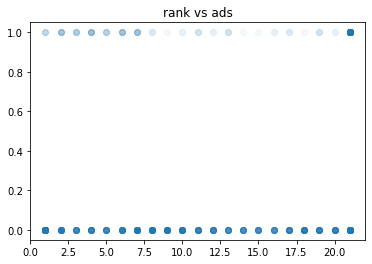

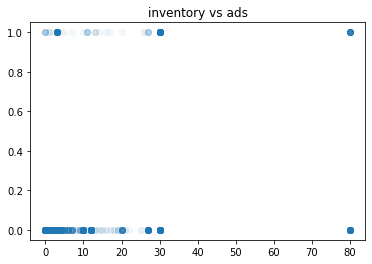

In [10]:
# scatterplot
plt.title("rank vs ads")
plt.scatter(prices_ads['calc_rank'], prices_ads['ads'],alpha=.05)
plt.show()
plt.title("inventory vs ads")
plt.scatter(prices_ads['calc_inven'], prices_ads['ads'],alpha=.05)
plt.show()

How do average prices differ between products that are sponsored/advertised in the search results versus products that are not. i.e. report the average price for products that are advertised against those that are not.

In [11]:
avg_price_ads = pd.DataFrame(prices.groupby('ads')['price'].mean())
avg_price_ads

,price
ads,
0.0,139.014312
1.0,71.306791


If a product stops being sponsored, does the price change?

In [12]:
avg_price_ads = pd.DataFrame(prices_ads.groupby('ads')['price'].mean())
avg_price_ads

,price
ads,
0.0,143.025531
1.0,75.429021


Create a variance, covariance matrix, separate for each platform, for the following variables:
* Weight
* Reviews
* Rating
* Rank
* Price
* Shipping times
* Inventory

In [13]:
price_columns = ['weight', 'reviews', 'rating', 'calc_rank', 'price','calc_ship','calc_inven']
prices[price_columns].mean()

weight         11.925497
reviews       453.236860
rating          4.574370
calc_rank      15.392608
price         137.824103
calc_ship       3.837644
calc_inven      8.660724
dtype: float64

In [14]:
prices[price_columns].max()

weight        1150.0
reviews       7780.0
rating           5.0
calc_rank       21.0
price          999.0
calc_ship        7.0
calc_inven      80.0
dtype: float64

In [15]:
prices[price_columns].cov()

,weight,reviews,rating,calc_rank,price,calc_ship,calc_inven
weight,2604.423543,-2177.917210,-1.386643,-6.774162,2985.016447,17.859732,-23.811845
reviews,-2177.917210,774971.840514,20.603209,-1479.492667,-4733.282367,-464.236932,2231.179616
rating,-1.386643,20.603209,0.135394,-0.035587,-0.350495,-0.110205,0.018742
calc_rank,-6.774162,-1479.492667,-0.035587,45.278658,-40.329812,0.142250,-10.373813
price,2985.016447,-4733.282367,-0.350495,-40.329812,20600.366505,3.681368,-310.033206
calc_ship,17.859732,-464.236932,-0.110205,0.142250,3.681368,5.834951,-4.021571
calc_inven,-23.811845,2231.179616,0.018742,-10.373813,-310.033206,-4.021571,121.620223
